#THE CODE FOR LS STARTS HERE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import progressbar
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
data_class1 = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class1_train.npy')
data_class2 = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class2_train.npy')
data_class3 = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class3_train.npy')
data_test1   = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class1_test.npy')
data_test2   = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class2_test.npy')
data_test3   = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class3_test.npy')
data = []

In [19]:
def func_G(x,cov, mean,p=1/3):
    inv_cov = np.linalg.pinv(cov)
    g = -0.5*np.matmul(np.matmul((x-mean),(inv_cov)),((x-mean).T))-0.5*(np.log(np.linalg.det(cov)))+np.log(p)-np.log(2.0*np.pi)
    if(isinstance(g,np.ndarray)):
        return g.diagonal()
    else:
        return g

In [20]:
def find_mean(data):
    return [np.sum(data[:,0])/data.shape[0],np.sum(data[:,1])/data.shape[0]]

def find_covariance(data, mean):
    a = []
    varx = (np.sum(data[:,0]**2)/data.shape[0])-(mean[0]**2)
    vary = (np.sum(data[:,1]**2)/data.shape[0])-(mean[1]**2)
    varxy = (np.sum(data[:,0]*data[:,1])/data.shape[0])-(mean[0]*mean[1])
    a = [[varx,varxy],[varxy,vary]]
    a = np.array(a)

    return a

In [21]:
def get_confusion_mat(classes, il=None,jl=None, kl=None):

    lis = []
    if((il != None) and (jl!=None) and (kl!=None)):
        conf_mat = np.full((3,3),1e-10)
        for i in range(data_test1.shape[0]):
            lis.append(0)
        for i in range(data_test2.shape[0]):
            lis.append(1)
        for i in range(data_test3.shape[0]):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        if(il==1 and jl==2):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test2.shape[0]):
                lis.append(1)
        if(il==1 and jl==3):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)
        if(il==2 and jl==3):
            for i in range(data_test2.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)

        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [22]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)

        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))

    return accuracy,precision,recall,f_measure

In [23]:
def find_range(data1, data2, data3, test):

    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(data3[:,0]))

    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(data3[:,1]))

    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(data3[:,0]))

    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(data3[:,1]))
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5

In [24]:
def pair_plot(data, dc1, dc2,cov1, cov2, mean1, mean2, il, jl):
    dat_blue = []
    dat_red = []
    dict_={1:'aquamarine',2:'lightsalmon',3:'thistle'}
    dict_2 = {1:'red',2:'green',3:'blue'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    for i in (range(data.shape[0])):
        g1 = func_G(data[i],cov1,mean1)
        g2 = func_G(data[i],cov2,mean2)
        if(np.argmax([g1,g2])==0):
            dat_red.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2])==1):
            dat_blue.append([data[i][0],data[i][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()


    data_test = []
    if(il==1 or jl==1):
        for i in range(data_test1.shape[0]):
            data_test.append([data_test1[i][0],data_test1[i][1]])
    if(il==2 or jl==2):
        for i in range(data_test2.shape[0]):
            data_test.append([data_test2[i][0],data_test2[i][1]])
    if(il==3 or jl==3):
        for i in range(data_test3.shape[0]):
            data_test.append([data_test3[i][0],data_test3[i][1]])

    data_test = np.array(data_test)
    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)

    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(classes, il,jl)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

def total_plot(data,cov1, cov2, cov3, mean1, mean2, mean3):

    dat_blue = []
    dat_red = []
    dat_green = []
    aquamarine_patch = mpatches.Patch(color='aquamarine', label='class1')
    lightsalmon_patch = mpatches.Patch(color='lightsalmon', label='class2')
    thistle_patch = mpatches.Patch(color='thistle', label='class3')
    for i in (range(data.shape[0])):
        g1 = func_G(data[i],cov1,mean1)
        g2 = func_G(data[i],cov2,mean2)
        g3 = func_G(data[i],cov3,mean3)
        if(np.argmax([g1,g2,g3])==0):
            dat_red.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2,g3])==1):
            dat_blue.append([data[i][0],data[i][1]])
        elif(np.argmax([g1,g2,g3])==2):
            dat_green.append([data[i][0],data[i][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    dat_green = np.array(dat_green)

    fig, ax = plt.subplots()
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='aquamarine')
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='lightsalmon')
    ax = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='thistle')
    ax = plt.legend(handles=[aquamarine_patch,lightsalmon_patch,thistle_patch])
    ax = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()

    minx1 = (mean1[0])-10
    miny1 = (mean1[1])-10
    maxx1 = (mean1[0])+10
    maxy1 = (mean1[1])+10

    minx2 = (mean2[0])-10
    miny2 = (mean2[1])-10
    maxx2 = (mean2[0])+10
    maxy2 = (mean2[1])+10

    minx3 = (mean3[0])-10
    miny3 = (mean3[1])-10
    maxx3 = (mean3[0])+10
    maxy3 = (mean3[1])+10



    x1 = np.linspace(minx1,maxx1,500)
    y1 = np.linspace(miny1,maxy1,500)
    n1 = 500
    Z1 = np.ndarray(shape=(n1,n1),dtype=float)
    for i in range(n1):
        for j in range(n1):
            P = [[x1[i],y1[j]]]
            P = np.array(P)
            g = func_G(P,cov1,mean1)
            Z1[j][i]=np.e**g[0]
    X1, Y1 = np.meshgrid(x1,y1)

    x2 = np.linspace(minx2,maxx2,500)
    y2 = np.linspace(miny2,maxy2,500)
    n2 = 500
    Z2 = np.ndarray(shape=(n2,n2),dtype=float)
    print(cov1)
    for i in range(n2):
        for j in range(n2):
            P = [[x2[i],y2[j]]]
            P = np.array(P)
            g = func_G(P,cov2,mean2)
            Z2[j][i]=np.e**g[0]
    X2, Y2 = np.meshgrid(x2,y2)

    x3 = np.linspace(minx3,maxx3,500)
    y3 = np.linspace(miny3,maxy3,500)
    n3 = 500
    Z3 = np.ndarray(shape=(n3,n3),dtype=float)
    print(cov2)
    for i in range(n3):
        for j in range(n3):
            P = [[x3[i],y3[j]]]
            P = np.array(P)
            g = func_G(P,cov3,mean3)
            Z3[j][i]=np.e**g[0]
    X3, Y3 = np.meshgrid(x3,y3)
    print(cov3)

    fig3, ax3 = plt.subplots()
    ax3 = plt.contour(X1, Y1, Z1, colors='black')
    ax3 = plt.contour(X2, Y2, Z2, colors='red')
    ax3 = plt.contour(X3, Y3, Z3, colors='green')
    ax3 = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='aquamarine')
    ax3 = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='lightsalmon')
    ax3 = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='thistle')
    ax3 = plt.legend(handles=[aquamarine_patch,lightsalmon_patch,thistle_patch])
    ax3 = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax3 = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax3 = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()

    data_test = []
    for i in range(data_test1.shape[0]):
        data_test.append([data_test1[i][0],data_test1[i][1]])
    for i in range(data_test2.shape[0]):
        data_test.append([data_test2[i][0],data_test2[i][1]])
    for i in range(data_test3.shape[0]):
        data_test.append([data_test3[i][0],data_test3[i][1]])

    data_test = np.array(data_test)

    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)
    g3 = func_G(data_test, cov3, mean3)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i],g3[i]]))

    conf_mat = get_confusion_mat(classes,1,2,3)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [27]:

data_test = []
for i in range(data_test1.shape[0]):
    data_test.append([data_test1[i][0],data_test1[i][1]])
for i in range(data_test2.shape[0]):
    data_test.append([data_test2[i][0],data_test2[i][1]])
for i in range(data_test3.shape[0]):
    data_test.append([data_test3[i][0],data_test3[i][1]])

data_test = np.array(data_test)
minx, miny, maxx,maxy = find_range(data_class1, data_class2, data_class3, data_test)
print(minx,miny,maxx,maxy)

data = []
for i in np.arange(minx,maxx,0.15):
    for j in np.arange(miny,maxy,0.15):
        data.append([i,j])
data = np.array(data)
print(data.shape[0])


-9.522300000000001 -23.73 29.279 14.2559
65786


In [28]:
mean11 = find_mean(data_class1)
mean22 = find_mean(data_class2)
mean33 = find_mean(data_class3)
mean11 = np.array(mean11)
mean22 = np.array(mean22)
mean33 = np.array(mean33)

cov11 = find_covariance(data_class1, mean11)
cov22 = find_covariance(data_class2, mean22)
cov33 = find_covariance(data_class3, mean33)
cov11 = np.array(cov11)
cov22 = np.array(cov22)
cov33 = np.array(cov33)

##ALL HAVE SAME DIAGONAL MATRIX

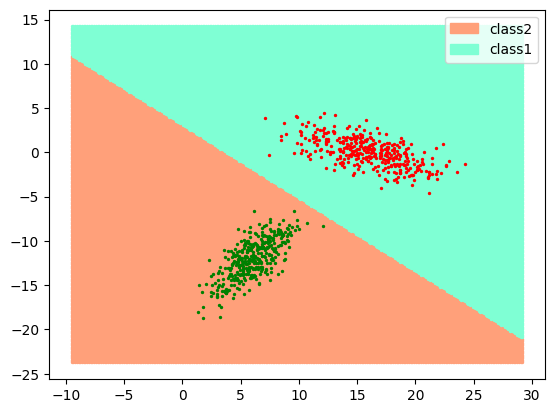

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


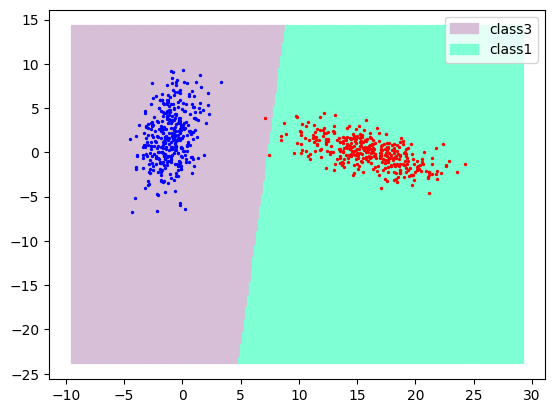

Confusion Matrix
[[1.24e+02 1.00e+00]
 [1.00e-10 1.25e+02]]
Accuracy:  [0.996 0.996]
Precision:  [1.         0.99206349]
Recall:  [0.992 1.   ]
F-Measure:  [0.99598394 0.99601594]
Mean F-Measure:  0.9959999359981824


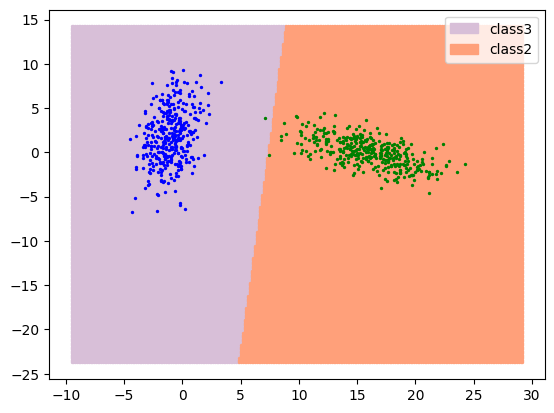

Confusion Matrix
[[5.60e+01 6.90e+01]
 [1.00e-10 1.25e+02]]
Accuracy:  [0.724 0.724]
Precision:  [1.        0.6443299]
Recall:  [0.448 1.   ]
F-Measure:  [0.61878453 0.78369906]
Mean F-Measure:  0.7012417949736254


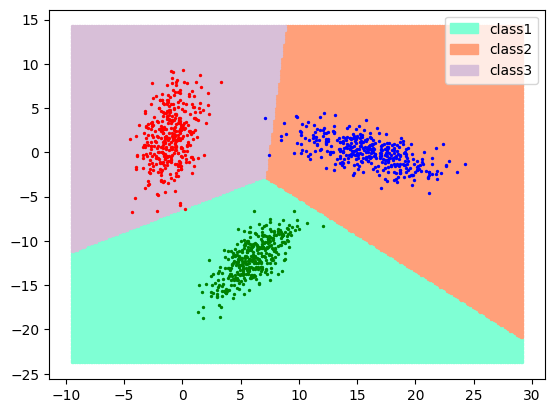

[[5.17846501 0.        ]
 [0.         5.17846501]]
[[5.17846501 0.        ]
 [0.         5.17846501]]
[[5.17846501 0.        ]
 [0.         5.17846501]]


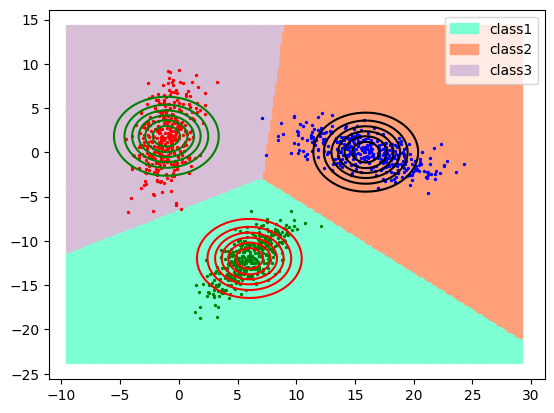

[[1.24e+02 1.00e-10 1.00e+00]
 [1.00e-10 1.25e+02 1.00e-10]
 [1.00e-10 1.00e-10 1.25e+02]]
Accuracy:  [0.99733333 1.         0.99733333]
Precision:  [1.         1.         0.99206349]
Recall:  [0.992 1.    1.   ]
F-Measure:  [0.99598394 1.         0.99601594]
Mean F-Measure:  0.9973332906643902


In [29]:
var_avg = (cov11[0][0]+cov22[0][0]+cov33[0][0]+cov11[1][1]+cov22[1][1]+cov33[1][1])/6
cov_new = [[var_avg,0],
           [0,var_avg]]


cov_new = np.array(cov_new)
pair_plot(data, data_class1, data_class2, cov_new, cov_new, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov_new, cov_new, mean11, mean33,1,3)
pair_plot(data, data_class1, data_class3, cov_new, cov_new, mean11, mean33,2,3)

total_plot(data, cov_new, cov_new, cov_new, mean11, mean22, mean33)

## WHEN ALL HAVE SAME COVARIANCE MATRIX

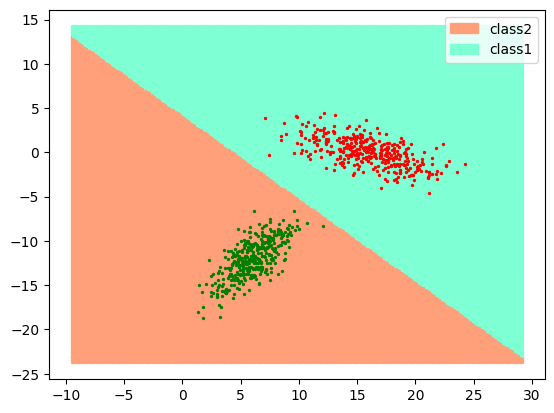

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


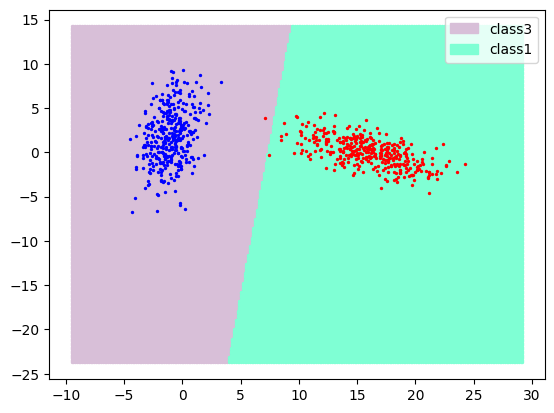

Confusion Matrix
[[1.24e+02 1.00e+00]
 [1.00e-10 1.25e+02]]
Accuracy:  [0.996 0.996]
Precision:  [1.         0.99206349]
Recall:  [0.992 1.   ]
F-Measure:  [0.99598394 0.99601594]
Mean F-Measure:  0.9959999359981824


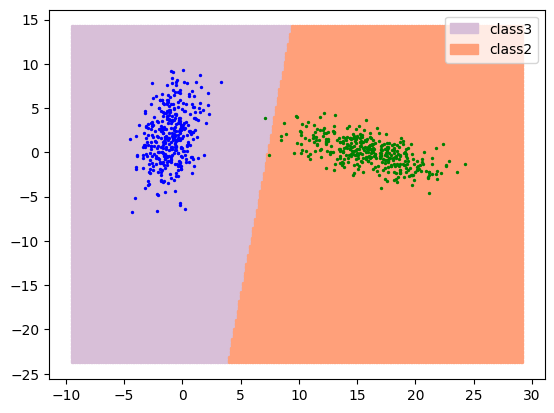

Confusion Matrix
[[7.60e+01 4.90e+01]
 [1.00e-10 1.25e+02]]
Accuracy:  [0.804 0.804]
Precision:  [1.        0.7183908]
Recall:  [0.608 1.   ]
F-Measure:  [0.75621891 0.8361204 ]
Mean F-Measure:  0.7961696534047349


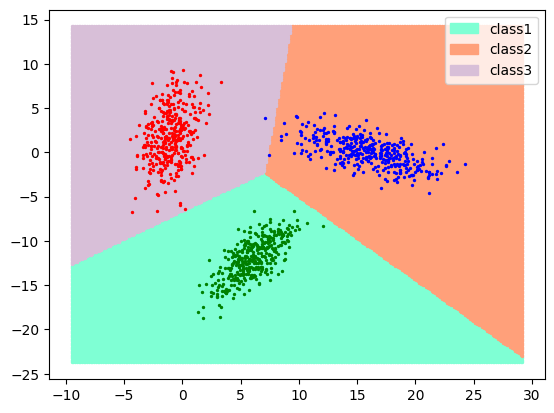

[[4.81406638 0.29343596]
 [0.29343596 5.54286364]]
[[4.81406638 0.29343596]
 [0.29343596 5.54286364]]
[[4.81406638 0.29343596]
 [0.29343596 5.54286364]]


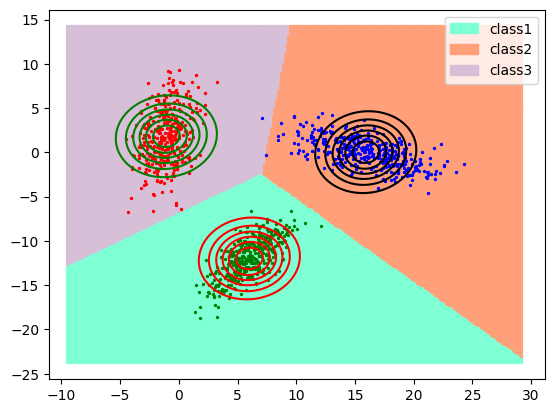

[[1.24e+02 1.00e-10 1.00e+00]
 [1.00e-10 1.25e+02 1.00e-10]
 [1.00e-10 1.00e-10 1.25e+02]]
Accuracy:  [0.99733333 1.         0.99733333]
Precision:  [1.         1.         0.99206349]
Recall:  [0.992 1.    1.   ]
F-Measure:  [0.99598394 1.         0.99601594]
Mean F-Measure:  0.9973332906643902


In [30]:
cov_new = np.add(np.add(cov11,cov22),cov33)/3
pair_plot(data, data_class1, data_class2, cov_new, cov_new, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov_new, cov_new, mean11, mean33,1,3)
pair_plot(data, data_class1, data_class3, cov_new, cov_new, mean11, mean33,2,3)

total_plot(data, cov_new, cov_new, cov_new, mean11, mean22, mean33)

## ALL CLASSES HAVE DIFFERENT COVARIANCE MATRIX BUT ARE DIAGONAL

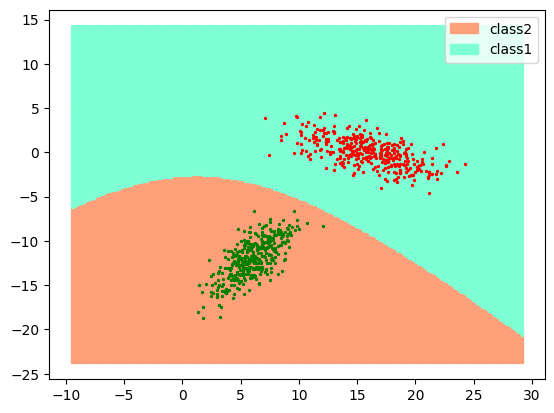

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


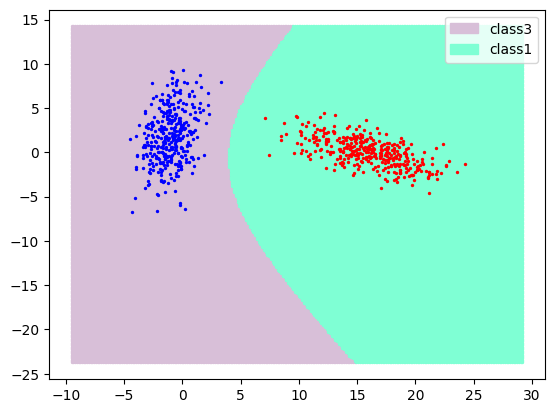

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


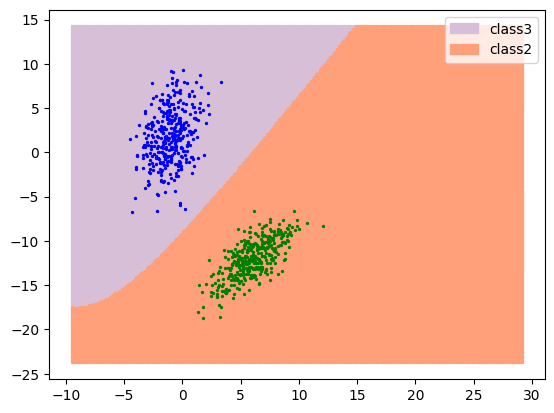

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


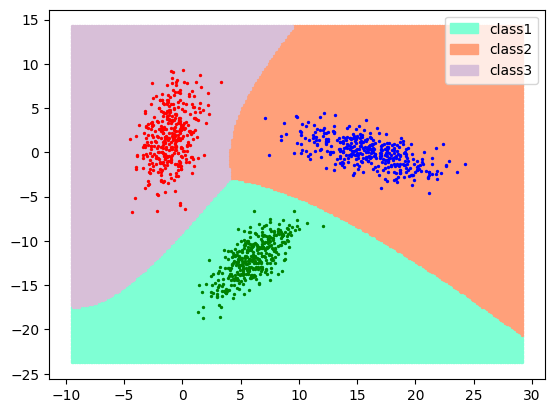

[[9.61984758 0.        ]
 [0.         2.55445384]]
[[3.14638759 0.        ]
 [0.         4.83253842]]
[[1.67596399 0.        ]
 [0.         9.24159864]]


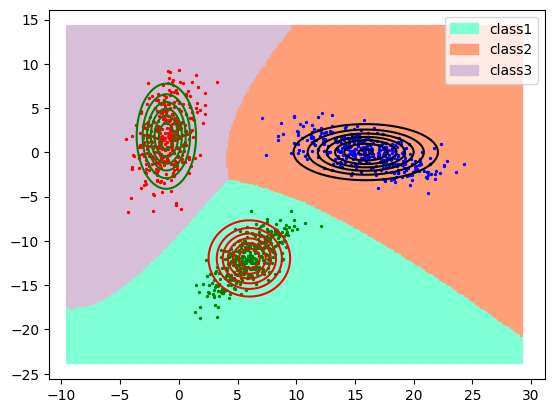

[[1.25e+02 1.00e-10 1.00e-10]
 [1.00e-10 1.25e+02 1.00e-10]
 [1.00e-10 1.00e-10 1.25e+02]]
Accuracy:  [1. 1. 1.]
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F-Measure:  [1. 1. 1.]
Mean F-Measure:  0.9999999999984


In [31]:
cov1_new = np.copy(cov11)
cov2_new = np.copy(cov22)
cov3_new = np.copy(cov33)
cov1_new[0][1]=0
cov1_new[1][0]=0
cov2_new[0][1]=0
cov2_new[1][0]=0
cov3_new[0][1]=0
cov3_new[1][0]=0

pair_plot(data, data_class1, data_class2, cov1_new, cov2_new, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov1_new, cov3_new, mean11, mean33,1,3)
pair_plot(data, data_class2, data_class3, cov2_new, cov3_new, mean22, mean33,2,3)

total_plot(data, cov1_new, cov2_new, cov3_new, mean11, mean22, mean33)

## ALL CLASSES WITH DIFFERENT COVARIANCE MATRICES

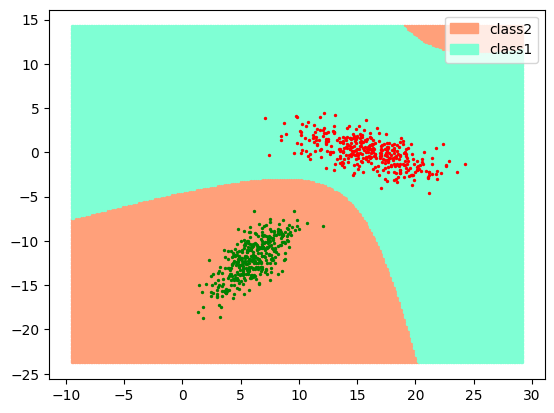

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


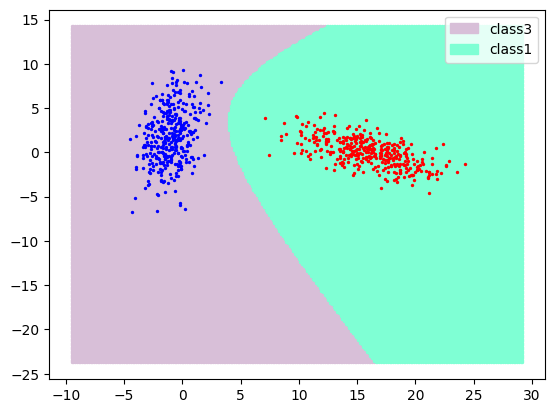

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


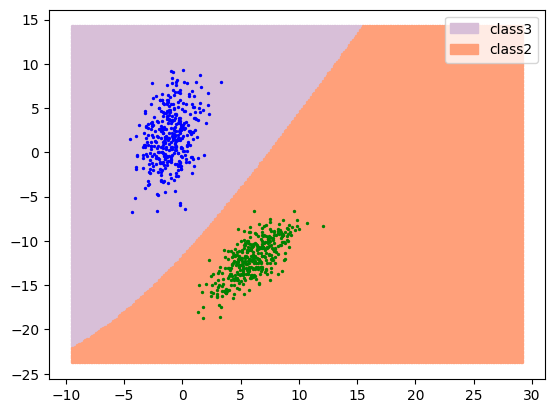

Confusion Matrix
[[1.25e+02 1.00e-10]
 [1.00e-10 1.25e+02]]
Accuracy:  [1. 1.]
Precision:  [1. 1.]
Recall:  [1. 1.]
F-Measure:  [1. 1.]
Mean F-Measure:  0.9999999999992


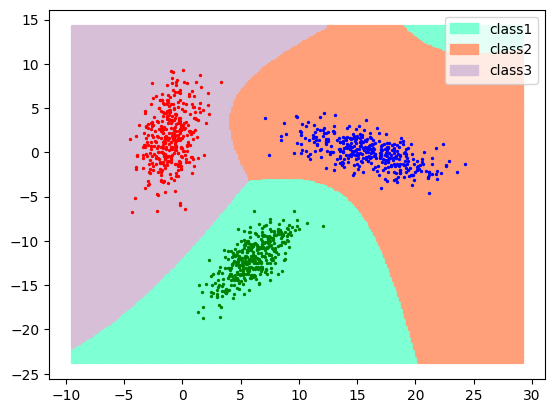

[[ 9.61984758 -3.03555063]
 [-3.03555063  2.55445384]]
[[3.14638759 2.79583322]
 [2.79583322 4.83253842]]
[[1.67596399 1.1200253 ]
 [1.1200253  9.24159864]]


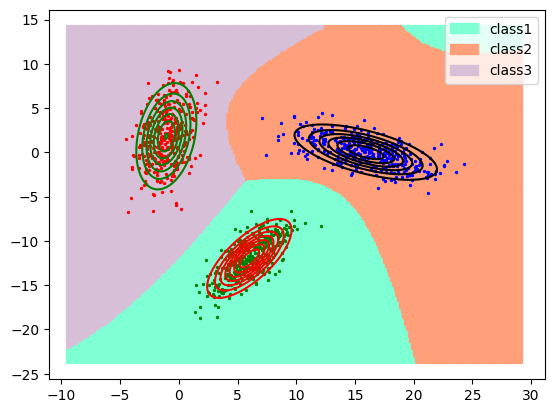

[[1.25e+02 1.00e-10 1.00e-10]
 [1.00e-10 1.25e+02 1.00e-10]
 [1.00e-10 1.00e-10 1.25e+02]]
Accuracy:  [1. 1. 1.]
Precision:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F-Measure:  [1. 1. 1.]
Mean F-Measure:  0.9999999999984


In [32]:
pair_plot(data, data_class1, data_class2, cov11, cov22, mean11, mean22,1,2)
pair_plot(data, data_class1, data_class3, cov11, cov33, mean11, mean33,1,3)
pair_plot(data, data_class2, data_class3, cov22, cov33, mean22, mean33,2,3)

total_plot(data, cov11, cov22, cov33, mean11, mean22, mean33)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .npy file
data = np.load('/content/drive/MyDrive/Group13/LS_Group13/Class3_test.npy')

# Check the shape of the data (assuming it's 2D)
print("Shape of the data:", data.shape)

Shape of the data: (125, 2)
